In [1]:
import pandas as pd
import smtplib
import matplotlib.pyplot as plt

from email.mime.image import MIMEImage
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.message import EmailMessage
from email.mime.base import MIMEBase

import codecs

In [2]:
dict_days = dict(zip(['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'], 
                     ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
                    ))
WEEK = 'WEEK-1'

1.85 lines/order
2.52 lines/order
Sunday
3,479 lines
14,583 lines


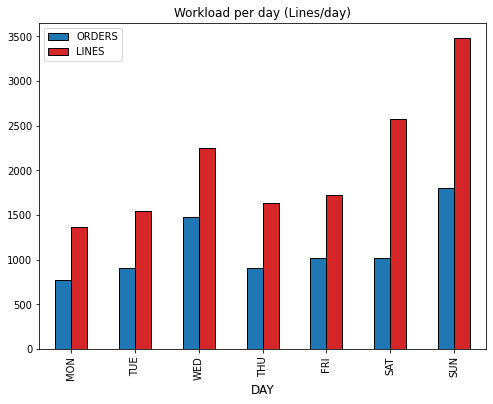

In [4]:
# Volumes per day
df_day = pd.read_csv('https://raw.githubusercontent.com/samirsaci/automated_report/main/volumes%20per%20day.csv')
df_plot = df_day[df_day['WEEK'] ==WEEK].copy()

''' Calculate KPIs for Comments'''
# Lines per orders
df_plot['LINES/ORDER'] = df_plot['LINES']/df_plot['ORDERS']
avg_ratio = '{:.2f} lines/order'.format(df_plot['LINES/ORDER'].mean())
max_ratio = '{:.2f} lines/order'.format(df_plot['LINES/ORDER'].max())
print(avg_ratio)
print(max_ratio)

# Maximum Day Lines
busy_day = dict_days[df_plot.set_index('DAY')['LINES'].idxmax()]
max_lines = '{:,} lines'.format(df_plot['LINES'].max())
print(busy_day)
print(max_lines)

# Total Workload
total_lines = '{:,} lines'.format(df_plot['LINES'].sum())
print(total_lines)

# Bar Plot: Orders/Lines
fig, ax = plt.subplots(figsize=(14, 7))
df_plot.plot.bar(figsize=(8, 6), edgecolor='black', x='DAY', y=['ORDERS', 'LINES'], 
                                           color=['tab:blue', 'tab:red'], legend= True, ax = ax)
plt.xlabel('DAY', fontsize = 12)
plt.title('Workload per day (Lines/day)', fontsize = 12)
plt.show()

In [5]:
# save plot
filename = 'visual' + ".png"
path_plot = filename
fig.savefig(path_plot, dpi=fig.dpi)

In [11]:
# Files Name
file_img = 'visual.png'
file_header =  "header_img.png"

# Settings
from_mail = '@gmail.com'
from_password = ''
to_mail = "@gmail.com"

# SMTP Server (example of gmail)
smtp_server = 'smtp.google.com'
smtp_port = 465

In [14]:
# Message Object
msg = MIMEMultipart()
msg['Subject'] = 'Workload Report for {}'.format(WEEK)
msg['From'] = from_mail
msg['To'] = ', '.join([from_mail, to_mail])
msg.preamble = 'Workload Report for {}'.format(WEEK)

# Open the visual
with open(file_img, 'rb') as fp:
    img = MIMEImage(fp.read())
    img.add_header('Content-Disposition', 'attachment', filename=file_img)
    img.add_header('X-Attachment-Id', '0')
    img.add_header('Content-ID', '<0>')
    fp.close()
    msg.attach(img)

# Open the header
with open(file_header, 'rb') as fp:
    img = MIMEImage(fp.read())
    img.add_header('Content-Disposition', 'attachment', filename=file_header)
    img.add_header('X-Attachment-Id', '1')
    img.add_header('Content-ID', '<1>')
    fp.close()
    msg.attach(img)

# Attach the HTML email
f = codecs.open("report.html", 'r')
string = f.read()

# Add the images in the HTML report
html_string = string.replace("IMG_HTML", "cid:0")
html_string = html_string.replace("HEADER_HTML", "cid:1")

# Add the insights
html_string = html_string.replace("WEEK", WEEK)
html_string = html_string.replace("total_lines", total_lines)
html_string = html_string.replace("busy_day", busy_day)
html_string = html_string.replace("max_lines", max_lines)
html_string = html_string.replace("avg_ratio", avg_ratio)
html_string = html_string.replace("max_ratio", max_ratio)

# Attach the HTML page
msg.attach(MIMEText(html_string, 'html', 'utf-8'))

# Send the email via our own SMTP server
server = smtplib.SMTP_SSL(smtp_server, smtp_port)
server.ehlo()
server.login(from_mail, from_password)

server.sendmail(from_mail, [from_mail, to_mail], msg.as_string())
server.quit()

KeyboardInterrupt: ignored